In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

### 1. Univariate analysis *(10 Marks)*

In [4]:
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


`No null values`

`Our target variable is strength i.e a continuous varibale. Hence we will use regressor version of all algorithms`


In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


`Slag, Ash and Superplastcizer can be zero. As Cement, water, coarseagg and fineagg are important constituents of cement.`

`Age should not be zero.`

`Concrete starts developing strength after 24 hours, its gain approx 15% of its strength after 1 day and around 99% strength after 28 days. Therefore min age has to be 1.`

In [19]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

`Age is highly skewed`

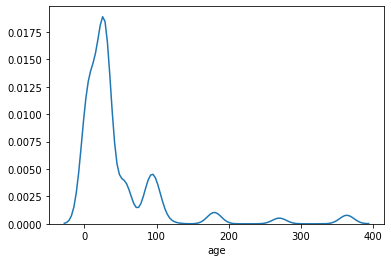

In [20]:
# To see skewness of age
sns.distplot(df['age'],hist=False)
plt.show()

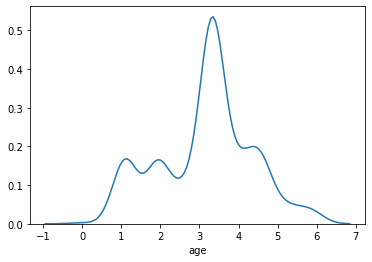

In [21]:
# Skewness of Age after log transformation
sns.distplot(np.log(df['age']),hist=False)
plt.show()

# log transformation to reduce skewness

In [22]:
df['age'] = np.log(df['age'])

## George's Tip
- Use CV to decide whether transforming skewed data is a good idea
- https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

### 2. Bi-variate analysis *(10 marks)*

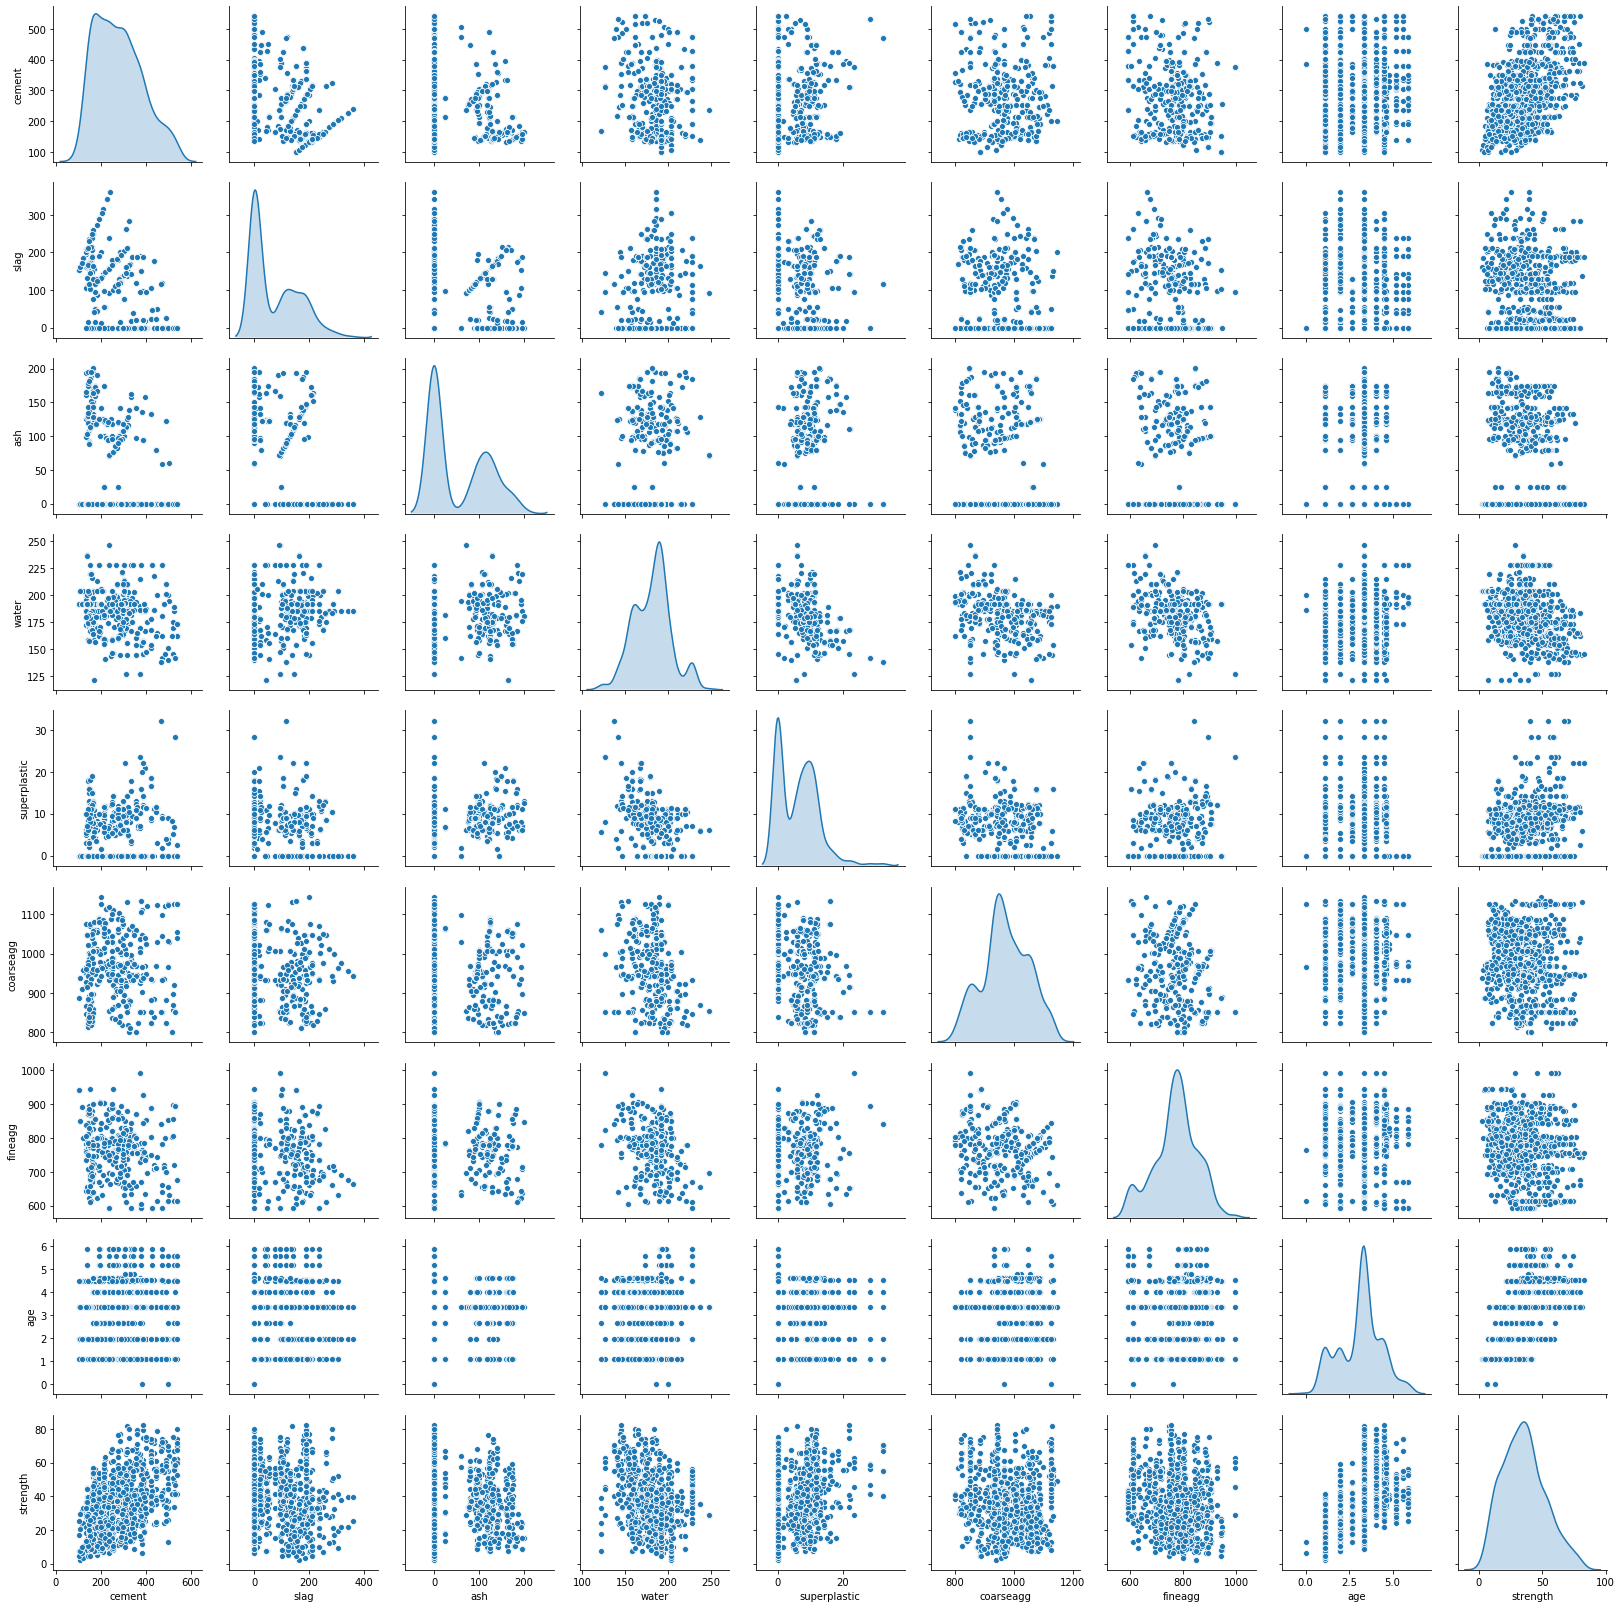

In [10]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde')
plt.show()

`As age is increasing strength is increasing`

`Cement and strength have a linear relationship`

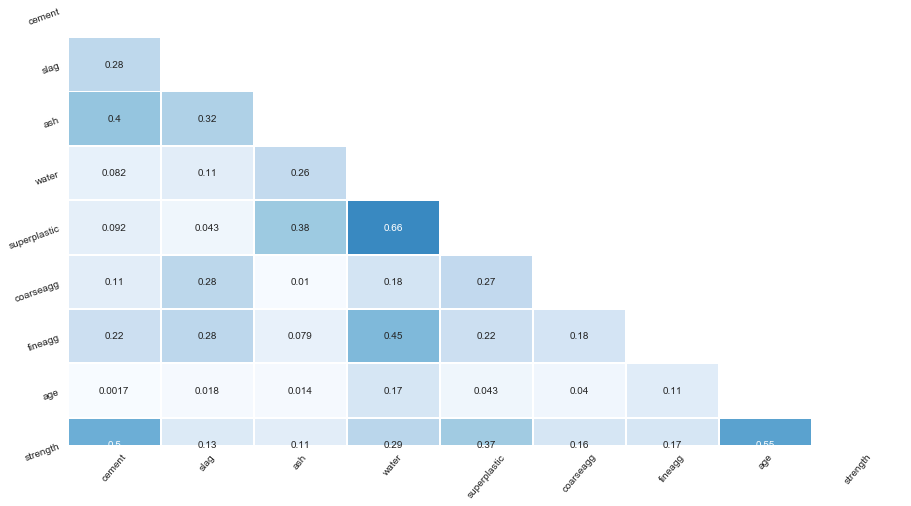

In [11]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(
    lower_triangle, 
    center=0.5, 
    cmap='Blues', 
    annot=True, 
    xticklabels=corr.index, 
    yticklabels = corr.columns,
    cbar= False, 
    linewidths= 1, 
    mask = mask
)   # Da Heatmap

plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`"age", "cement" have the highest correlation with the target`

### 3. Feature Engineering techniques (10 marks)

In [25]:
df['water:cement'] = df['water']/df['cement']  # Extracting a new column

In [26]:
df['coarseagg:fineagg'] = df['coarseagg'] / df['fineagg'] # Extracting a new column

In [27]:
df = df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'water:cement', 'coarseagg:fineagg', 'strength']] # rearranging columns

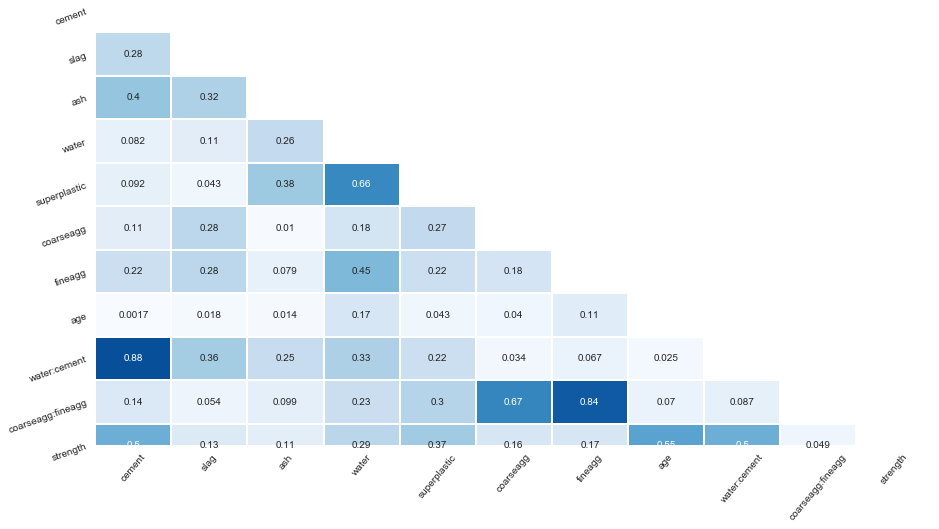

In [28]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`So we can have w:c a feature in place of water and cement because it shows high correlation with strength`

`ca:fa doesnt look good so we will drop it`

In [29]:
df = df.drop(['cement','water','coarseagg:fineagg'],axis=1)

In [30]:
# Separating dependent and independent variables
x = df.drop('strength',axis=1)
y = df['strength']

In [31]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

## George's Bonus
- https://machinelearningmastery.com/train-final-machine-learning-model/

In [33]:
#Degree 1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([                                # pipeline for scaling and modelling
    ('scaler',StandardScaler()),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9953725270651557
0.8546550160042635


## George's Bonus
- Polynomial features
- https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [34]:
#Degree 2
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('reg', DecisionTreeRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9953725270651557
0.8168801522263445


In [35]:
#Degree 3

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=3)),
    ('reg', DecisionTreeRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9953725270651557
0.788375931346025


`As it is visible that highest score is in degree one so going fprward with degree 1`

## Models

### 1. Different Models *(15 marks)*

In [46]:
from sklearn.model_selection import cross_val_score,KFold
k =  KFold(random_state=7,n_splits=5)

# KFold will split the data in 5 equal parts

## George's Challenge
- How does CV work?

In [47]:
model= []
tr = []
te = []
rmse = []

# Blanks list to store model name, training score, testing score and Root mean squared error

## George's Challenge
- What's the difference between train/test score and RMSE?

In [48]:
# Linear Regression
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression()),
])

pipeline.fit(xtrain,ytrain)


model.append('Linear Regression')
tr.append(pipeline.score(xtrain,ytrain))
te.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
rmse.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

## Follow up
- `cross_val_score(pipeline, xtest, ytest, cv=k).mean()` is the MSE
- `(-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5` is the RMSE


## George's Challenge
- Why cannot we do `pipeline.score(xest,ytest)` to get the test score?
- Whey `neg_mean_squared_error`?
- Explain `(-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5`

In [26]:
# Decision Tree

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', DecisionTreeRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)


model.append('Decision Tree')
tr.append(pipeline.score(xtrain,ytrain))
te.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
rmse.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

## George's Bonus
- Dummy classifier/regressor

In [55]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(xtrain, ytrain)
dummy_regr.score(xtest, ytest)

-0.0008796567658913012

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', RandomForestRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)


model.append('Random Forest')
tr.append(pipeline.score(xtrain,ytrain))
te.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
rmse.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [57]:
# Bagging
from sklearn.ensemble import BaggingRegressor
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', BaggingRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)


model.append('Bagging')
tr.append(pipeline.score(xtrain,ytrain))
te.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
rmse.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [58]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', AdaBoostRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)


model.append('AdaBoost')
tr.append(pipeline.score(xtrain,ytrain))
te.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
rmse.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [59]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', GradientBoostingRegressor(random_state=7)),
])

pipeline.fit(xtrain,ytrain)


model.append('Gradient Boosting')
tr.append(pipeline.score(xtrain,ytrain))
te.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
rmse.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

## George's Challenge
- What's one issue with the code in the last several cells?

In [60]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

,Training Score,Testing Score,RMSE
Model,,,
Linear Regression,0.766743,0.731641,8.267811
Random Forest,0.978794,0.810802,6.931774
Bagging,0.978880,0.812727,6.881039
AdaBoost,0.814924,0.739577,8.075765
Gradient Boosting,0.947152,0.860467,5.983469


`Gradient Boosting is the best algorithm here`

`Bagging and Random Forest are almost same, second best algorithms`

## George's Challenge
- Do we really need both the ${R}^2$ and RMSE?

## George's Bonus
- https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

### 2. Hyper Parameter Tuning *(15 marks)*

In [61]:
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

# Scaling of data, as grid search and random search is done without pipeline

## George's Challenge
- Can we use `fit_transform` with the test set?

**Grid Search on Random Forest**

In [33]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,3, 4],
    'min_samples_split': [2,3,5],
    'n_estimators': [25,50,'warn']
}    

grid = GridSearchCV(estimator = rf, param_grid = params, cv = k)

grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn'...bs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
  

## George's Bonus
- No space within parentheses

In [34]:
rf = grid.best_estimator_
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=7, verbose=0,
                      warm_start=False)

In [35]:
from sklearn.metrics import mean_squared_error
model = ['Random forest after Grid search']
tr = [rf.score(xtrain,ytrain)]
te = [rf.score(xtest,ytest)]
rmse = [mean_squared_error(ytest,rf.predict(xtest))**0.5]
# print("Training Score:",rf.score(xtrain,ytrain))
# print("Testing Score:",rf.score(xtest,ytest))
# print("RMSE:",mean_squared_error(ytest,rf.predict(xtest))**0.5)

**Random Search on Gradient Boosting**

In [36]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                               

In [38]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [39]:
gb = random.best_estimator_
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=None,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [40]:
model.append('Gradient Boosting after RandomCV')
tr.append(gb.score(xtrain,ytrain))
te.append(gb.score(xtest,ytest))
rmse.append(mean_squared_error(ytest,gb.predict(xtest))**0.5)

In [41]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

,Training Score,Testing Score,RMSE
Model,,,
Random forest after Grid search,0.995372,0.921083,4.517347
Gradient Boosting after RandomCV,0.994772,0.930805,4.229942


`Gradient Boosting gives better results after hyperparameter tuning as well`

`Hence our final model was able to explain 93.08 % variance was explained by the model from all the independent variables with RMSE score of 4.2 Mpa in concrete strength`

`Our final model is slightly overfit but the testing score is high enough so we can use this model for now or we can try to reduce noise by changing parameters`

## George's Challenge
- How do we just overfit?

## George's Bonus
- Learning curve https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
- Predictive Power Score
- https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [1]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9634 sha256=53a0c6bcc8453827c81a240af82b3c4aedb3962be0081bc0100e0272c275d92c
  Stored in directory: C:\Users\georg\AppData\Local\pip\Cache\wheels\29\32\a2\82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [11]:
import ppscore as pps
pps.matrix(df)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,0.459668,0.366466,0.451299,0.294399,0.596324,0.632847,0.043810,0.001730
slag,0.677683,1.000000,0.238973,0.387910,0.128674,0.628750,0.659455,0.004457,0.000000
ash,0.710575,0.319508,1.000000,0.666972,0.599079,0.763587,0.744409,0.171454,0.000000
water,0.684442,0.442842,0.315401,1.000000,0.461173,0.667900,0.720622,0.136746,0.000000
superplastic,0.688649,0.420312,0.310082,0.744762,1.000000,0.705340,0.749248,0.216575,0.031304
coarseagg,0.573250,0.382083,0.315891,0.499762,0.272137,1.000000,0.711287,0.035347,0.000000
fineagg,0.612826,0.400229,0.253951,0.533152,0.223654,0.653190,1.000000,0.027977,0.000000
age,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
strength,0.135617,0.075697,0.015349,0.135974,0.048513,0.119450,0.108111,0.234353,1.000000


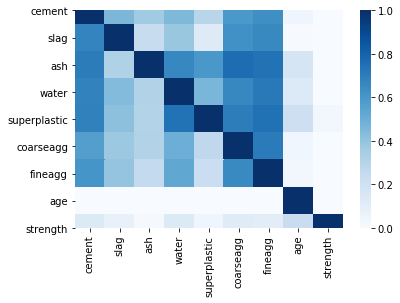

In [13]:
sns.heatmap(pps.matrix(df),  cmap='Blues')